## Homework

> Note: sometimes your answer might not match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

The goal of this homework is to familiarize you with BentoML and how to build and test an ML production service.

## Background

You are a new recruit at ACME corp. Your manager is emailing you about your first assignment.


## Email from your manager

Good morning recruit! It's good to have you here! I have an assignment for you. I have a data scientist that's built
a credit risk model in a jupyter notebook. I need you to run the notebook and save the model with BentoML and see
how big the model is. If it's greater than a certain size, I'm going to have to request additional resources from 
our infra team. Please let me know how big it is.

Thanks,

Mr McManager

## Question 1

* Install BentoML
* What's the version of BentoML you installed?
* Use `--version` to find out

`bentoml --version`

**bentoml, version 1.0.7**   

## Question 2

Run the notebook which contains the xgboost model from module 6 i.e previous module and save the xgboost model with BentoML. To make it easier for you we have prepared this [notebook](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/07-bentoml-production/code/train.ipynb). 


How big approximately is the saved BentoML model? Size can slightly vary depending on your local development environment.
Choose the size closest to your model.

* 924kb
* 724kb
* **114kb**
* 8kb

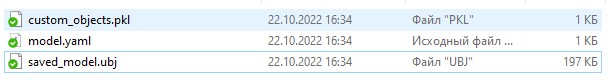


## Another email from your manager

Great job recruit! Looks like I won't be having to go back to the procurement team. Thanks for the information.

However, I just got word from one of the teams that's using one of our ML services and they're saying our service is "broken"
and their trying to blame our model. I looked at the data their sending and it's completely bogus. I don't want them
to send bad data to us and blame us for our models. Could you write a pydantic schema for the data that they should be sending?
That way next time it will tell them it's their data that's bad and not our model.

Thanks,

Mr McManager

## Question 3

Say you have the following data that you're sending to your service:

```json
{
  "name": "Tim",
  "age": 37,
  "country": "US",
  "rating": 3.14
}
```

What would the pydantic class look like? You can name the class `UserProfile`.

In [2]:
from pydantic import BaseModel

class UserProfile(BaseModel):
    name: str
    age: int
    country: str
    rating: float

## Email from your CEO

Good morning! I hear you're the one to go to if I need something done well! We've got a new model that a big client
needs deployed ASAP. I need you to build a service with it and test it against the old model and make sure that it performs
better, otherwise we're going to lose this client. All our hopes are with you!

Thanks,

CEO of Acme Corp

## Question 4

We've prepared a model for you that you can import using:

```bash
curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel.bentomodel
bentoml models import coolmodel.bentomodel
```

What version of scikit-learn was this model trained with?

* **1.1.1**
* 1.1.2
* 1.1.3
* 1.1.4
* 1.1.5

`bentoml models get mlzoomcamp_homework:qtzdz3slg6mwwdu5`

```
name: mlzoomcamp_homework
version: qtzdz3slg6mwwdu5
module: bentoml.sklearn
labels: {}
options: {}
metadata: {}
context:
  framework_name: sklearn
  framework_versions:
    scikit-learn: 1.1.1
  bentoml_version: 1.0.7
  python_version: 3.9.12
signatures:
  predict:
    batchable: false
api_version: v1
creation_time: '2022-10-13T20:42:14.411084+00:00'
```

**scikit-learn: 1.1.1**

## Question 5 

Create a bento out of this scikit-learn model. The output type for this endpoint should be `NumpyNdarray()`

Send this array to the Bento:

```
[[6.4,3.5,4.5,1.2]]
```

You can use curl or the Swagger UI. What value does it return? 

* 0
* **1**
* 2
* 3

(Make sure your environment has Scikit-Learn installed) 

## bentofile.yaml
```
service: "service:svc"  # Same as the argument passed to `bentoml serve`
labels:
    owner: darkcorp
    stage: dev
    project: mlzoomcamp_homework
include:
- "*.py"  # A pattern for matching which files to include in the bento
python:
    packages:  # Additional pip packages required by the service
    - scikit-learn
    - pandas
```

## service.py

In [ ]:
import numpy as np

import bentoml
from bentoml.io import NumpyNdarray

model_ref = bentoml.sklearn.get("mlzoomcamp_homework:qtzdz3slg6mwwdu5")

model_runner = model_ref.to_runner()

svc = bentoml.Service("mlzoomcamp_homework", runners=[model_runner])

@svc.api(input=NumpyNdarray(), output=NumpyNdarray())
async def classify_numpy(vector)-> np.ndarray:
    return await model_runner.predict.async_run(vector)

`bentoml build`

Successfully built Bento(tag="mlzoomcamp_homework:jwcylxcswgq4iaav")

`bentoml serve service.py:svc --reload`

2022-10-23T20:23:39+0300 [INFO] [cli] Starting development HTTP BentoServer from "service.py:svc" running on http://0.0.0.0:3000 (Press CTRL+C to quit)

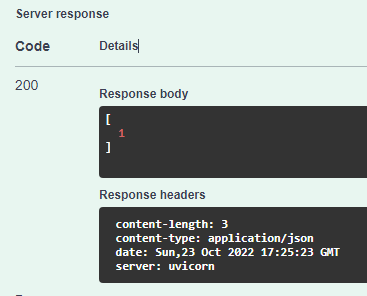

bentoml containerize mlzoomcamp_homework:latest

## Question 6

Ensure to serve your bento with `--production` for this question

Install locust using:

```bash
pip install locust
```

Use the following locust file: [https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/locustfile.py](locustfile.py)

Ensure that it is pointed at your bento's endpoint (In case you didn't name your endpoint "classify")

<img src="https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/classify-endpoint.png?raw=true">

Configure 100 users with ramp time of 10 users per second. Click "Start Swarming" and ensure that it is working.

Now download a second model with this command:

```bash
curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel
```

Or you can download with this link as well:
[https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel](https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel)

Now import the model:

```bash
bentoml models import coolmodel2.bentomodel
```

Update your bento's runner tag and test with both models. Which model allows more traffic (more throughput) as you ramp up the traffic?

**Hint 1**: Remember to turn off and turn on your bento service between changing the model tag. Use Ctl-C to close the service in between trials.

**Hint 2**: Increase the number of concurrent users to see which one has higher throughput

Which model has better performance at higher volumes?

* **The first model**
* The second model

`locust -H http://localhost:3000`

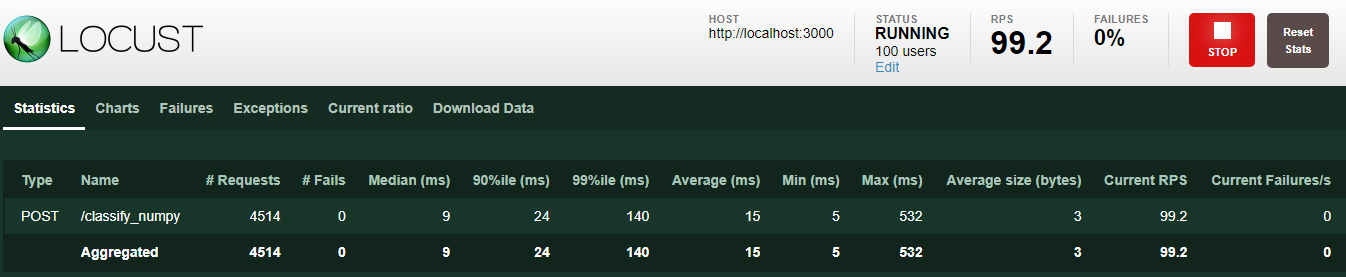

` Tag                                   Module           Size      Creation Time
 mlzoomcamp_homework:jsi67fslz6txydu5  bentoml.sklearn  5.82 KiB  2022-10-14 17:48:43    model2
 mlzoomcamp_homework:qtzdz3slg6mwwdu5  bentoml.sklearn  5.79 KiB  2022-10-13 23:42:14    model1`

## model1 - 150 users 
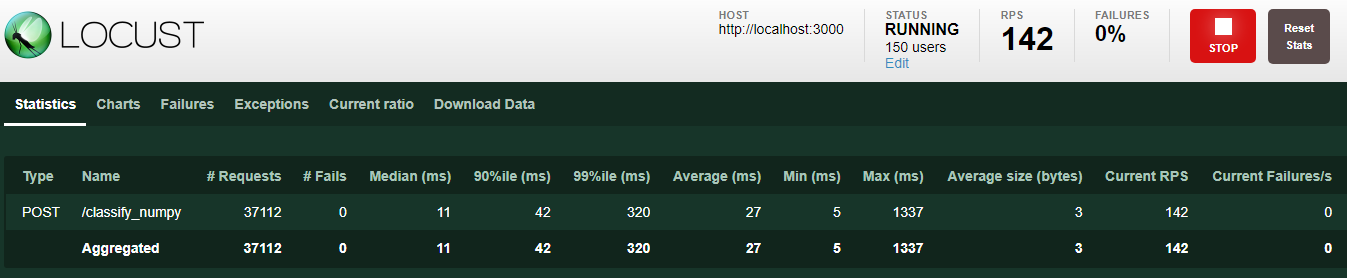

## model2 - 150 users 
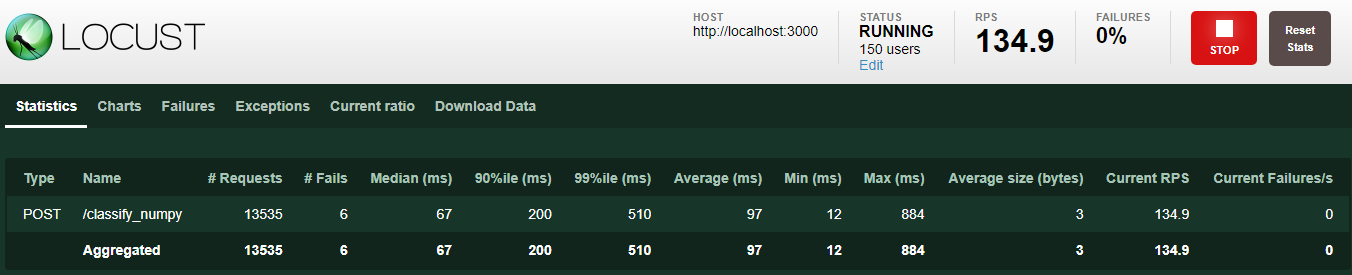

In [ ]:
## service.py

import numpy as np

import bentoml
from bentoml.io import NumpyNdarray

model_ref = bentoml.sklearn.get("mlzoomcamp_homework:jsi67fslz6txydu5")

model_runner = model_ref.to_runner()

svc = bentoml.Service("mlzoomcamp_homework", runners=[model_runner])

@svc.api(input=NumpyNdarray(), output=NumpyNdarray())
async def classify_numpy(vector)-> np.ndarray:
    return await model_runner.predict.async_run(vector)

```
bentoml serve --production
[ERROR] [cli] Could not bind 0.0.0.0:3000

lsof -i tcp:3000
COMMAND PID     USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
bentoml  51 darkcorp    3u  IPv4  16598      0t0  TCP *:3000 (LISTEN)
python  712 darkcorp    3u  IPv4  16598      0t0  TCP *:3000 (LISTEN)

kill -9 51
kill -9 712
```

In [ ]:
bentoml serve --production
locust -H http://localhost:3000

## Email from marketing

Hello ML person! I hope this email finds you well. I've heard there's this cool new ML model called Stable Diffusion.
I hear if you give it a description of a picture it will generate an image. We need a new company logo and I want it
to be fierce but also cool, think you could help out?

Thanks,

Mike Marketer

## Question 7 (optional)

Go to this Bento deployment of Stable Diffusion: http://54.176.205.174/ (or deploy it yourself)

Use the txt2image endpoint and update the prompt to: "A cartoon dragon with sunglasses". 
Don't change the seed, it should be 0 by default

What is the resulting image?

### #1
<img src="https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/dragon1.jpeg">

### #2 
<img src="https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/dragon2.jpeg?raw=true">

### #3 
<img src="https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/dragon3.jpeg?raw=true">

### #4
<img src="https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/dragon4.jpeg?raw=true">

## Submit the results

* Submit your results here: https://forms.gle/Hh9FWy6LGXk3wJYs8
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one

## Deadline

The deadline for submitting is **24 October 2022 (Monday), 23:00 CEST (Berlin time)**. 

After that, the form will be closed